### Model Building for Each stage to analyze important factor.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split

### Soil Plant Analysis Development(SPAD)

In [25]:
# Load the dataset
data = pd.read_csv('SPAD.csv')
data.head()

,P,K,temperature,humidity,ph,rainfall,temperature_min,phenological_stage,leaf_area_index,spad_value,...,Phenological_Stage_Num,Normalized_SPAD,Growth_Stage,Leaf_Age,Fertilizer_Type,Irrigation_mm,Crop_Yield_g_per_plant,Plant_Variety,Epigenetic_Markers,Soil_Nitrogen
0,42,43,20.879744,82.002744,6.502985,202.935536,18.765005,Germination,4.906222,25.859851,...,0,-1.015650,15.728596,1,Urea,20,87.5,Variety_A,83.555061,44.737543
1,58,41,21.770462,80.319644,7.038096,226.655537,18.037935,Germination,2.040303,38.874521,...,0,0.529820,23.766875,1,DAP,20,92.0,Variety_A,85.490865,67.252921
2,55,44,23.004459,82.320763,7.840207,263.964248,19.774700,Flowering,2.847604,21.199694,...,3,-1.623814,39.963756,4,DAP,20,79.5,Variety_A,85.266289,36.675470
3,35,40,26.491096,80.158363,6.980401,242.864034,23.107836,Flowering,2.880328,32.666838,...,3,-0.289251,55.795946,4,Urea,20,74.5,Variety_A,81.263860,56.513631
4,42,42,20.130175,81.604873,7.628473,262.717340,16.650526,Germination,3.822810,41.280424,...,0,0.815516,63.128778,1,DAP,20,81.0,Variety_A,82.231590,71.415134


In [27]:
data.columns

Index(['P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
       'temperature_min', 'phenological_stage', 'leaf_area_index',
       'spad_value', 'GDD', 'Cumulative_GDD', 'Phenological_Stage_Num',
       'Normalized_SPAD', 'Growth_Stage', 'Leaf_Age', 'Fertilizer_Type',
       'Irrigation_mm', 'Crop_Yield_g_per_plant', 'Plant_Variety',
       'Epigenetic_Markers', 'Soil_Nitrogen'],
      dtype='object')

In [4]:
data['phenological_stage'].unique()

array(['Germination', 'Flowering', 'Maturity', 'Tillering',
       'Panicle Initiation'], dtype=object)

In [5]:
data.describe()

,P,K,temperature,humidity,ph,rainfall,temperature_min,leaf_area_index,spad_value,GDD,Cumulative_GDD,Phenological_Stage_Num,Normalized_SPAD,Growth_Stage,Leaf_Age,Irrigation_mm,Crop_Yield_g_per_plant,Epigenetic_Markers,Soil_Nitrogen
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2.200000e+03,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,22.603917,3.037772,35.040046,14.121357,14958.527651,2.002727,-4.090909e-12,16064.068150,3.002727,25.290909,76.031818,80.041530,60.619280
std,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,5.222073,1.152603,8.589770,5.078644,9306.058671,1.412602,9.990901e-01,9940.772756,1.412602,4.992665,39.959335,24.350889,14.860302
min,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,4.502515,1.000102,20.014768,0.000000,9.822374,0.000000,-1.793315e+00,15.728596,1.000000,20.000000,8.500000,38.024539,34.625549
25%,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,19.450365,2.052143,27.824920,11.172097,6359.112223,1.000000,-8.389990e-01,6915.048500,2.000000,20.000000,47.000000,65.329751,48.137112
50%,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,22.667351,3.049996,34.971077,14.123405,14666.602365,2.000000,-5.554205e-04,15770.071995,3.000000,30.000000,73.000000,75.253057,60.499963
75%,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,25.437936,4.023133,42.273524,16.952160,22703.015007,3.000000,8.289691e-01,24359.186235,4.000000,30.000000,89.500000,86.488222,73.133197
max,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,42.007166,4.999727,49.992072,32.683841,31066.985420,4.000000,1.842997e+00,33270.456720,5.000000,30.000000,192.500000,153.509964,86.486284


#### 1. Data Preprocessing

#### 1.1 Categorical Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Fertilizer_Type_encoded'] = le.fit_transform(data['Fertilizer_Type'])
data['Plant_Variety_encoded'] = le.fit_transform(data['Plant_Variety'])

In [7]:
data.drop(['phenological_stage', 'Fertilizer_Type', 'Plant_Variety'], axis=1, inplace=True)

In [8]:
data.head(3)

,P,K,temperature,humidity,ph,rainfall,temperature_min,leaf_area_index,spad_value,GDD,...,Phenological_Stage_Num,Normalized_SPAD,Growth_Stage,Leaf_Age,Irrigation_mm,Crop_Yield_g_per_plant,Epigenetic_Markers,Soil_Nitrogen,Fertilizer_Type_encoded,Plant_Variety_encoded
0,42,43,20.879744,82.002744,6.502985,202.935536,18.765005,4.906222,25.859851,9.822374,...,0,-1.015650,15.728596,1,20,87.5,83.555061,44.737543,2,0
1,58,41,21.770462,80.319644,7.038096,226.655537,18.037935,2.040303,38.874521,9.904199,...,0,0.529820,23.766875,1,20,92.0,85.490865,67.252921,0,0
2,55,44,23.004459,82.320763,7.840207,263.964248,19.774700,2.847604,21.199694,11.389579,...,3,-1.623814,39.963756,4,20,79.5,85.266289,36.675470,0,0


#### 1.2 Scaling and Normalization

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
numerical_cols = ['P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
       'temperature_min', 'leaf_area_index', 'spad_value', 'GDD',
       'Cumulative_GDD', 'Normalized_SPAD', 'Growth_Stage', 'Leaf_Age', 
        'Irrigation_mm', 'Crop_Yield_g_per_plant', 'Epigenetic_Markers', 'Soil_Nitrogen'
        ]

categorical_cols = ['Fertilizer_Type_encoded', 'Phenological_Stage_Num', 'Plant_Variety_encoded']

numerical_data = data[numerical_cols]
categorical_data = data[categorical_cols]

In [11]:
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)

# Converting scaled data to DataFrame
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_cols)

# Combining scaled numerical data with categorical data
final_df = pd.concat([scaled_numerical_df, categorical_data], axis=1)

In [12]:
final_df.head(3)

,P,K,temperature,humidity,ph,rainfall,temperature_min,leaf_area_index,spad_value,GDD,...,Normalized_SPAD,Growth_Stage,Leaf_Age,Irrigation_mm,Crop_Yield_g_per_plant,Epigenetic_Markers,Soil_Nitrogen,Fertilizer_Type_encoded,Phenological_Stage_Num,Plant_Variety_encoded
0,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361,-0.735299,1.621438,-1.068979,-0.846675,...,-1.016806,-1.614763,-1.418080,-1.059977,0.287062,0.144320,-1.068979,2,0,0
1,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058,-0.874561,-0.865602,0.446502,-0.830560,...,0.530423,-1.613954,-1.418080,-1.059977,0.399702,0.223835,0.446502,0,0,0
2,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066,-0.541904,-0.165028,-1.611626,-0.538017,...,-1.625663,-1.612324,0.706143,-1.059977,0.086813,0.214610,-1.611626,0,3,0


In [13]:
# Defining a function to compute regression metrics
def calculate_regression_metrics(y_test, y_pred, stage_name='Stage'):
    # R-squared (R2)
    r2 = round(r2_score(y_test, y_pred) * 100, 2)
    
    # Mean Absolute Error (MAE)
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    
    # Mean Squared Error (MSE)
    mse = round(mean_squared_error(y_test, y_pred), 2)
    
    # Root Mean Squared Error (RMSE)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

    print(f"{stage_name} -R-squared (R2): {r2}")
    print(f"{stage_name} -Mean Absolute Error (MAE): {mae}")
    print(f"{stage_name} -Mean Squared Error (MSE): {mse}")
    print(f"{stage_name} -Root Mean Squared Error (RMSE): {rmse}")
    print()
    return {
        'R2': r2,
        'MAE':mae,
        'MSE':mse,
        'RMSE':rmse,
    }

### Model Building:
#### RandomForestRegressor

In [14]:
# Initialize dictionaries to store results
stage_importances = {}
stage_scores = {}

# Loop through each unique phenological stage
for stage in final_df['Phenological_Stage_Num'].unique():
    # Filtering the dataset for the current stage
    stage_data = final_df[final_df['Phenological_Stage_Num'] == stage]
    
    # Defining features and target
    X_stage = stage_data.drop(columns=['Crop_Yield_g_per_plant'])
    y_stage = stage_data['Crop_Yield_g_per_plant']
    
    # Split into train-test sets
    X_train, X_test, y_train, y_test = train_test_split(X_stage, y_stage, test_size=0.2, random_state=42)
    
    # Training the Random Forest model
    rf_stage = RandomForestRegressor(n_estimators =100, random_state=42)
    rf_stage.fit(X_train, y_train)
    
    # Make predictions and evaluate the model
    y_pred_rf = rf_stage.predict(X_test)
    
    metrics = calculate_regression_metrics(y_test, y_pred_rf, stage_name=f"Stage {stage}")
    
    stage_scores[stage] = list(metrics.values())
    stage_importances[stage] = rf_stage.feature_importances_ 

Stage 0 -R-squared (R2): 96.9
Stage 0 -Mean Absolute Error (MAE): 0.12
Stage 0 -Mean Squared Error (MSE): 0.02
Stage 0 -Root Mean Squared Error (RMSE): 0.15

Stage 3 -R-squared (R2): 95.38
Stage 3 -Mean Absolute Error (MAE): 0.15
Stage 3 -Mean Squared Error (MSE): 0.04
Stage 3 -Root Mean Squared Error (RMSE): 0.2

Stage 4 -R-squared (R2): 97.18
Stage 4 -Mean Absolute Error (MAE): 0.12
Stage 4 -Mean Squared Error (MSE): 0.02
Stage 4 -Root Mean Squared Error (RMSE): 0.14

Stage 1 -R-squared (R2): 96.38
Stage 1 -Mean Absolute Error (MAE): 0.14
Stage 1 -Mean Squared Error (MSE): 0.03
Stage 1 -Root Mean Squared Error (RMSE): 0.16

Stage 2 -R-squared (R2): 95.81
Stage 2 -Mean Absolute Error (MAE): 0.12
Stage 2 -Mean Squared Error (MSE): 0.02
Stage 2 -Root Mean Squared Error (RMSE): 0.15



In [15]:
stage_scores_df = pd.DataFrame(stage_scores).transpose()
stage_scores_df.rename(columns = {0 :'R2', 1:'MAE' , 2: 'MSE', 3:'RMSE'}, inplace = True)
#stage_scores_df.sort_values(by = 'RMSE', ascending = True, inplace = True)

In [16]:
stage_scores_df

,R2,MAE,MSE,RMSE
0,96.90,0.12,0.02,0.15
3,95.38,0.15,0.04,0.20
4,97.18,0.12,0.02,0.14
1,96.38,0.14,0.03,0.16
2,95.81,0.12,0.02,0.15


In [17]:
stage_importances_df = pd.DataFrame(stage_importances, index=X_stage.columns).T

In [18]:
def plot_feature_importance(stage_importances_df, stage):
    if stage not in stage_importances_df.index:
        raise ValueError(f"Stage '{stage}' not found in the DataFrame.")
    
    stage_importance = stage_importances_df.loc[stage]
    sorted_importance = stage_importance.sort_values(ascending=True)

    plt.figure(figsize=(6, 5))
    plt.barh(sorted_importance.index, sorted_importance.values, color='skyblue')
    plt.title(f'Feature Importance at {stage}')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

#### Satge 1: Germination

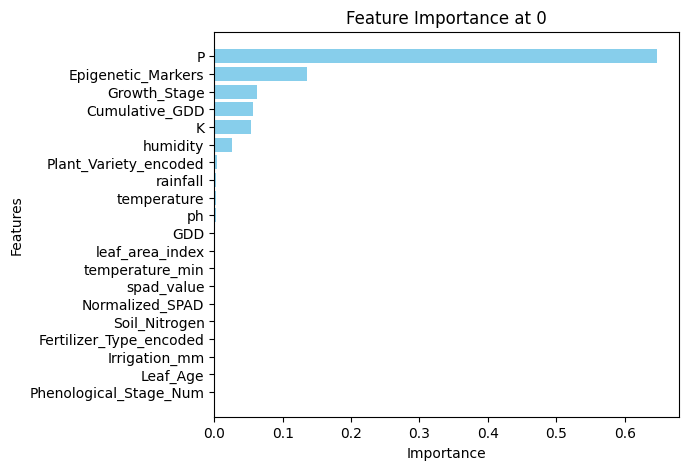

In [19]:
plot_feature_importance(stage_importances_df, 0)

#### Conclusion:
1. Phosphorus (P) is the most important factor for crop yield during the germination stage.
2. Epigenetic Markers also have a notable influence.
3. Growth Stage and Cumulative GDD (Growing Degree Days) are moderately important.
4. Potassium (K) and Humidity have lower but still relevant importance, suggesting their contributions to early root and leaf development.
5. Other factors, such as rainfall, temperature, and soil properties (pH, Soil Nitrogen), have minimal importance at this stage, indicating that they might not be critical during germination or their effects might become more prominent in later growth stages.

* At the germination stage (Stage 1), based on the feature importance analysis, here are actionable steps farmers can take to optimize crop yield:
  
> *  Optimize Phosphorus (P) Levels:
      * Soil Testing for Phosphorus
      * Apply Phosphorus-Rich Fertilizers

> *  Use High-Quality Seeds with Favorable Epigenetic Traits:
      * Select Varieties with Strong Genetic Potential
      * Consider Seed Coatings or Treatments

> *  Monitor and Manage Growing Degree Days (GDD):
      * Track Accumulated Heat Units

> *  Ensure Sufficient Potassium (K) and Humidity
> *  Choose Plant Varieties Suited to Local Conditions
> *  Irrigation and Moisture Control

* By taking these steps, farmers can improve the chances of successful crop establishment and higher yields later in the season.

### Stage 2: Tillering	

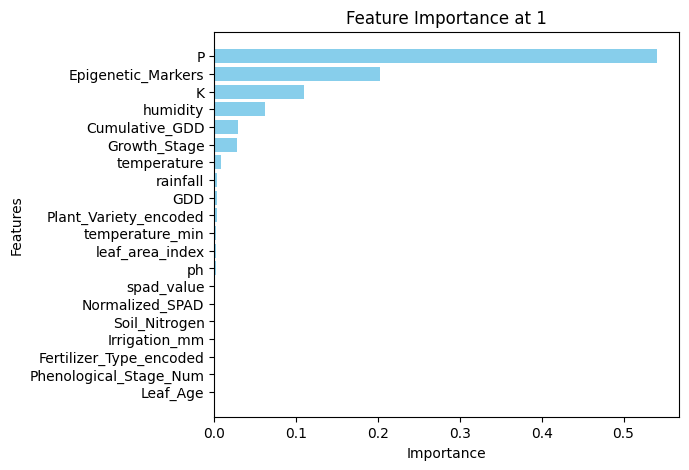

In [20]:
plot_feature_importance(stage_importances_df, 1)

#### Conclusion:
1. The most significant factor during the tillering stage is Phosphorus (P).
2. The second most important factor is Epigenetic Markers, which likely indicate the genetic response of the plant to environmental factors or stress.
3. Potassium (K) ranks next in importance. Potassium improves water uptake, strengthens plant stalks, and helps with disease resistance.
4. Humidity plays a significant role during this stage.
5. Cumulative GDD and Growth Stage have a smaller but notable impact. These are tied to the plant's development rate and timing of tillering.
6. Temperature is also a notable factor. Optimal temperatures support healthy tillering, while extremes (too hot or too cold) can negatively impact growth.

* At the Tillering stage (Stage 1), based on the feature importance analysis, here are actionable steps farmers can take to optimize crop yield:
  
> *  Phosphorus Management
      * Soil Testing for Phosphorus
      

> *   Monitor and Reduce Plant Stress:
      * To optimize the crop’s genetic potential (epigenetic markers), ensure minimal 
        environmental stress. This can be achieved through proper irrigation, pest control, and 
        maintaining soil health.

> *  Balanced Potassium Fertilization

> *  Manage Humidity:
      * In humid regions, take steps to avoid excess humidity, such as using drip irrigation to 
        minimize leaf wetness or adjusting irrigation schedules. In drier areas, ensure crops are 
        not water-stressed by using mulching or timely irrigation.

> *  Track GDD and Growth Stage

* By focusing on these key factors, farmers can optimize their crop management practices during the tillering stage, ultimately improving crop health and yield.

### Stage 3: Panicle Initiation

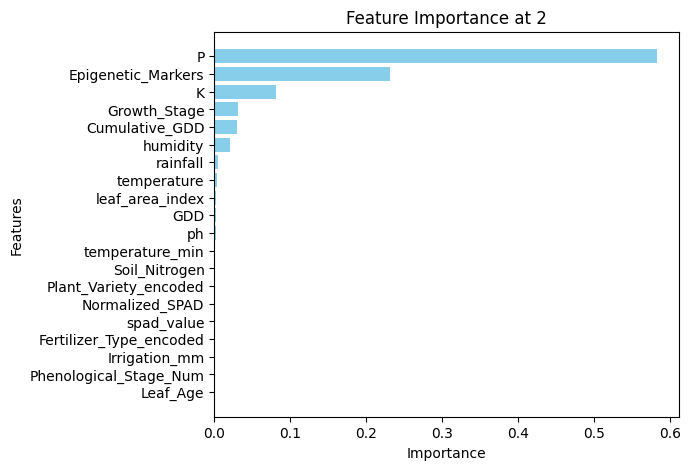

In [61]:
plot_feature_importance(stage_importances_df, 2)

#### Conclusion:
1. Phosphorus (P): This is the most important feature by a significant margin.
2. Epigenetic Markers: These markers come second in importance.
3. Potassium (K): Potassium is the third most important feature.
* Rest are less important at this stage.

### Stage 4: Flowering 

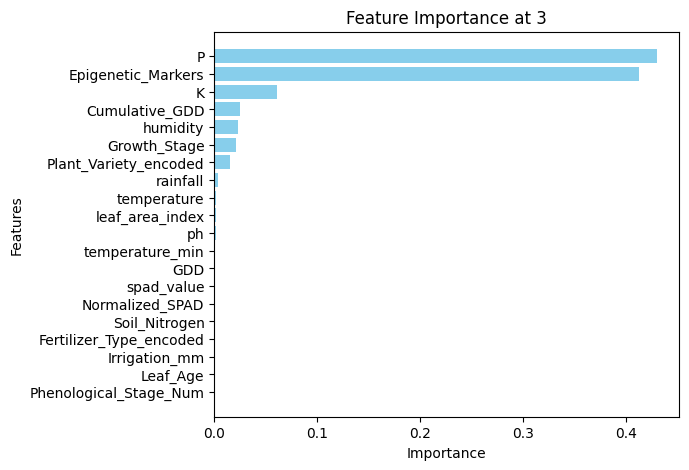

In [62]:
plot_feature_importance(stage_importances_df, 3)

#### Conclusion:
* The results are almost same the previous stage with more importance to Epigenetic factors at this stage.

### Stage 5: Maturity

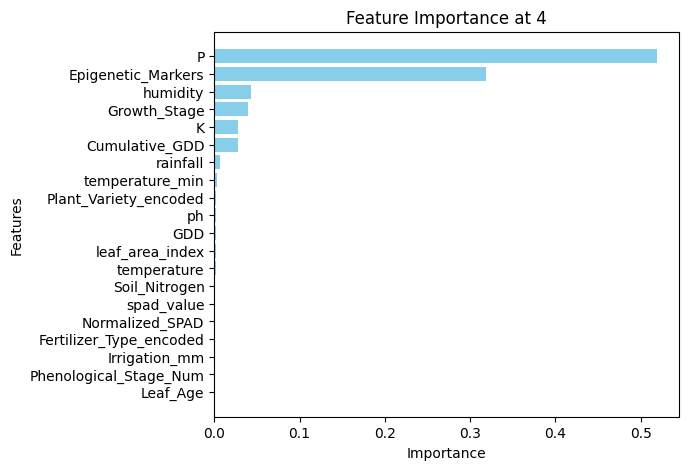

In [63]:
plot_feature_importance(stage_importances_df, 4)

#### Conclusion:
* At the last stage Humidity has higher role. If rainfall is low or humidity is insufficient, consider supplemental irrigation to avoid moisture stress during the maturity stage.